In [1]:
import numpy as np
from getdist import plots, MCSamples
import getdist
import matplotlib.pyplot as plt

In [21]:
def samp2gd(chains,names,labels,label=None,settings=None):
    samples=chains[:,:-3]
    weights=chains[:,-3]
    logl=chains[:,-2]
    logp=chains[:,-1]
    ranges={}
    if 'w' in names:
        ranges['w']=[-3,1]
    if 'wa' in names:        
        ranges['wa']=[-3,2]
    if 'OmegaM' in names:
        ranges['OmegaM']=[0.01,0.99]
    if 'omegab' in names:
        ranges['omegab'] = [0.005,0.1]
    if 'h' in names:
        ranges['h'] = [0.2,1]
    if 'dm' in names:
        ranges['sys'] = [-15,-5]
    if 'sys' in names:
        ranges['sys'] = [1,9]    
    gdsamp=MCSamples(samples=samples, weights = weights, names = names, labels = labels, label = label, ranges=ranges, settings=settings)
    p=gdsamp.getParams()
    gdsamp.addDerived(p.h*100.,name='H0',label='H_0',range=[20,100])
    return gdsamp

In [5]:
labels = [r'w_0',r'w_a',r'\Omega_m',r'\omega_b','h'] 
names = ['w','wa','OmegaM','omegab','h']
labels_sys = [r'w_0',r'w_a',r'\Omega_m',r'\omega_b','h','sys'] 
names_sys = ['w','wa','OmegaM','omegab','h','sys']
labels_sn = [r'w_0',r'w_a',r'\Omega_m',r'\omega_b','h','dm'] 
names_sn = ['w','wa','OmegaM','omegab','h','dm']
labels_sn_sys = [r'w_0',r'w_a',r'\Omega_m',r'\omega_b','h','sys','dm'] 
names_sn_sys = ['w','wa','OmegaM','omegab','h','sys','dm']

In [30]:
base_w_wa_baosys={}
base_w_wa={}
base_w_wa_baosys['desi']=samp2gd(np.loadtxt('chains/base_w_wa_baosys_desi.txt'),names=names_sys,labels=labels_sys,label=r'DESI(w/ sys)')
base_w_wa_baosys['desi_cmb']=samp2gd(np.loadtxt('chains/base_w_wa_baosys_desi_cmb.txt'),names=names_sys,labels=labels_sys,label=r'DESI(w/ sys)+CMB')
base_w_wa_baosys['desi_cmb_union3']=samp2gd(np.loadtxt('chains/base_w_wa_baosys_desi_cmb_union3.txt'),names=names_sn_sys,labels=labels_sn_sys,label=r'DESI(w/ sys)+CMB+Union3')            
base_w_wa['desi']=samp2gd(np.loadtxt('chains/base_w_wa_desi.txt'),names=names,labels=labels,label=r'DESI(w/o sys)')
base_w_wa['desi_cmb']=samp2gd(np.loadtxt('chains/base_w_wa_desi_cmb.txt'),names=names,labels=labels,label=r'DESI(w/o sys)+CMB',settings={'smooth_scale_2D':0.3})
base_w_wa['desi_cmb_union3']=samp2gd(np.loadtxt('chains/base_w_wa_desi_cmb_union3.txt'),names=names_sn,labels=labels_sn,label=r'DESI(w/o sys)+CMB+Union3')            

base_w_wa_baosys['desi-sdss']=samp2gd(np.loadtxt('chains/base_w_wa_baosys_desi-sdss.txt'),names=names_sys,labels=labels_sys,label=r'DESI-SDSS(w/ sys)')
base_w_wa_baosys['desi-sdss_cmb']=samp2gd(np.loadtxt('chains/base_w_wa_baosys_desi-sdss_cmb.txt'),names=names_sys,labels=labels_sys,label=r'DESI-SDSS(w/ sys)+CMB')
base_w_wa_baosys['desi-sdss_cmb_union3']=samp2gd(np.loadtxt('chains/base_w_wa_baosys_desi-sdss_cmb_union3.txt'),names=names_sn_sys,labels=labels_sn_sys,label=r'DESI-SDSS(w/ sys)+CMB+Union3')            
base_w_wa['desi-sdss']=samp2gd(np.loadtxt('chains/base_w_wa_desi-sdss.txt'),names=names,labels=labels,label=r'DESI-SDSS(w/o sys)')
base_w_wa['desi-sdss_cmb']=samp2gd(np.loadtxt('chains/base_w_wa_desi-sdss_cmb.txt'),names=names,labels=labels,label=r'DESI-SDSS(w/o sys)+CMB',settings={'smooth_scale_2D':0.3})
base_w_wa['desi-sdss_cmb_union3']=samp2gd(np.loadtxt('chains/base_w_wa_desi-sdss_cmb_union3.txt'),names=names_sn,labels=labels_sn,label=r'DESI-SDSS(w/o sys)+CMB+Union3')            


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


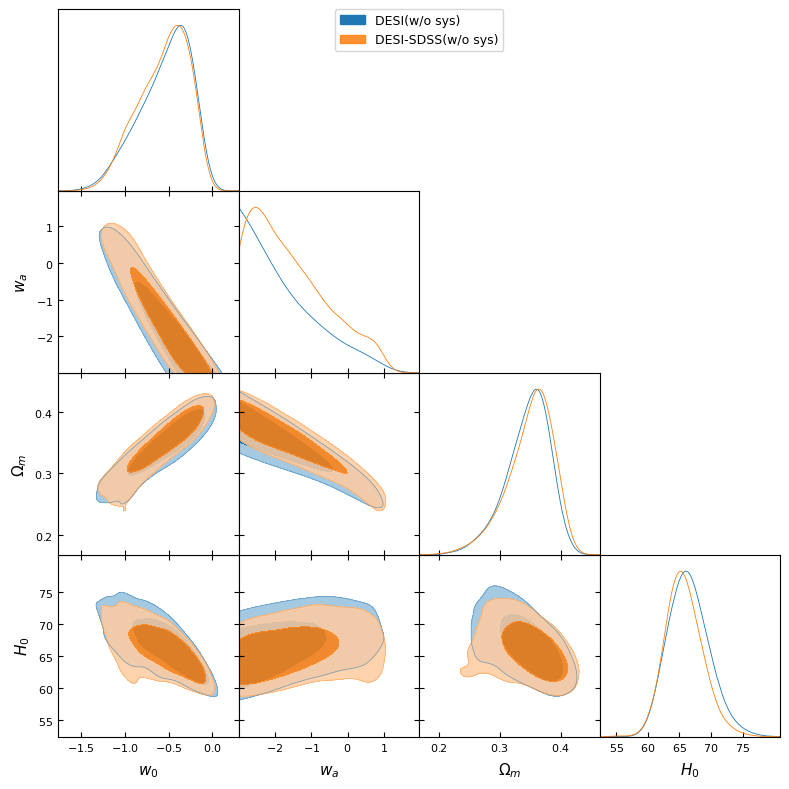

In [20]:
g = plots.get_subplot_plotter()
g.triangle_plot([base_w_wa['desi'],base_w_wa['desi-sdss']], 
                ['w','wa','OmegaM','H0'],
                filled=True, 
                colors=['C0','C1'],
                line_args=[{'color':'C0'},
               {'color':'C1'}],
               )

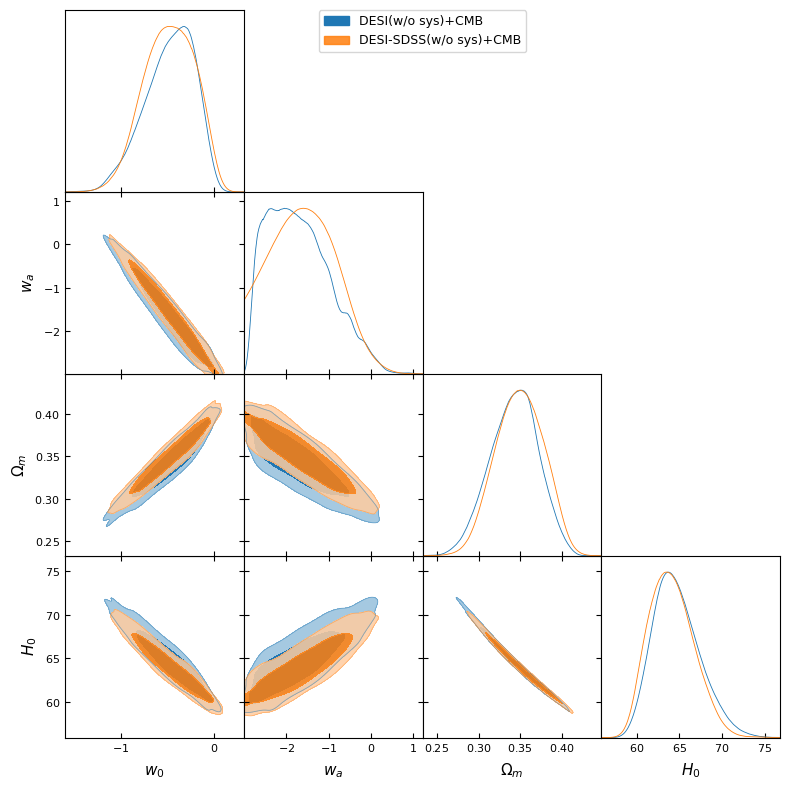

In [31]:
g = plots.get_subplot_plotter()
g.triangle_plot([base_w_wa['desi_cmb'],base_w_wa['desi-sdss_cmb']], 
                ['w','wa','OmegaM','H0'],
                filled=True, 
                colors=['C0','C1'],
                line_args=[{'color':'C0'},
               {'color':'C1'}],
               )

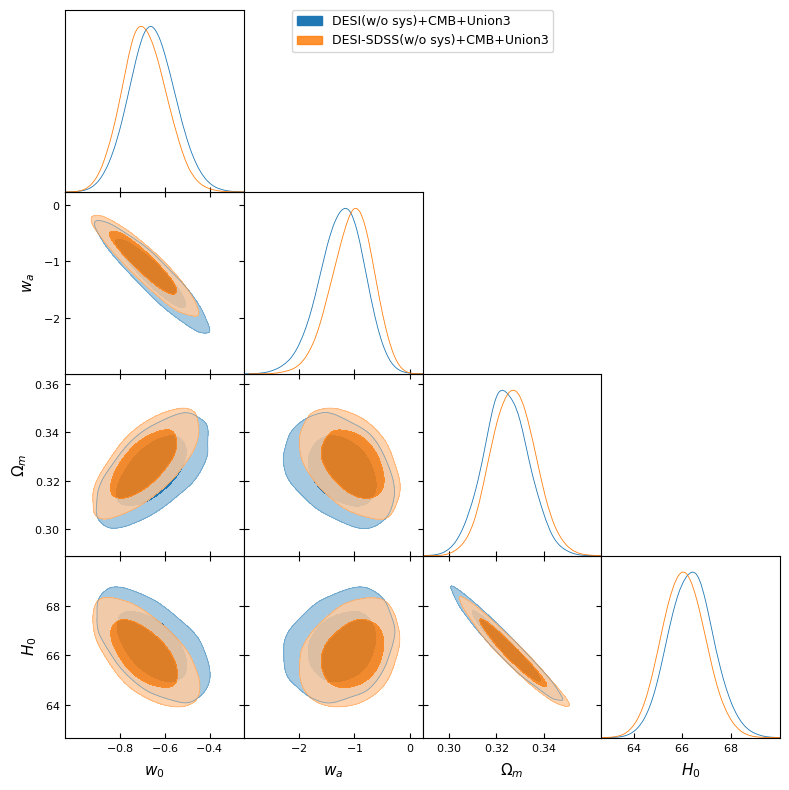

In [19]:
g = plots.get_subplot_plotter()
g.triangle_plot([base_w_wa['desi_cmb_union3'],base_w_wa['desi-sdss_cmb_union3']], 
                ['w','wa','OmegaM','H0'],
                filled=True, 
                colors=['C0','C1'],
                line_args=[{'color':'C0'},
               {'color':'C1'}],
               )

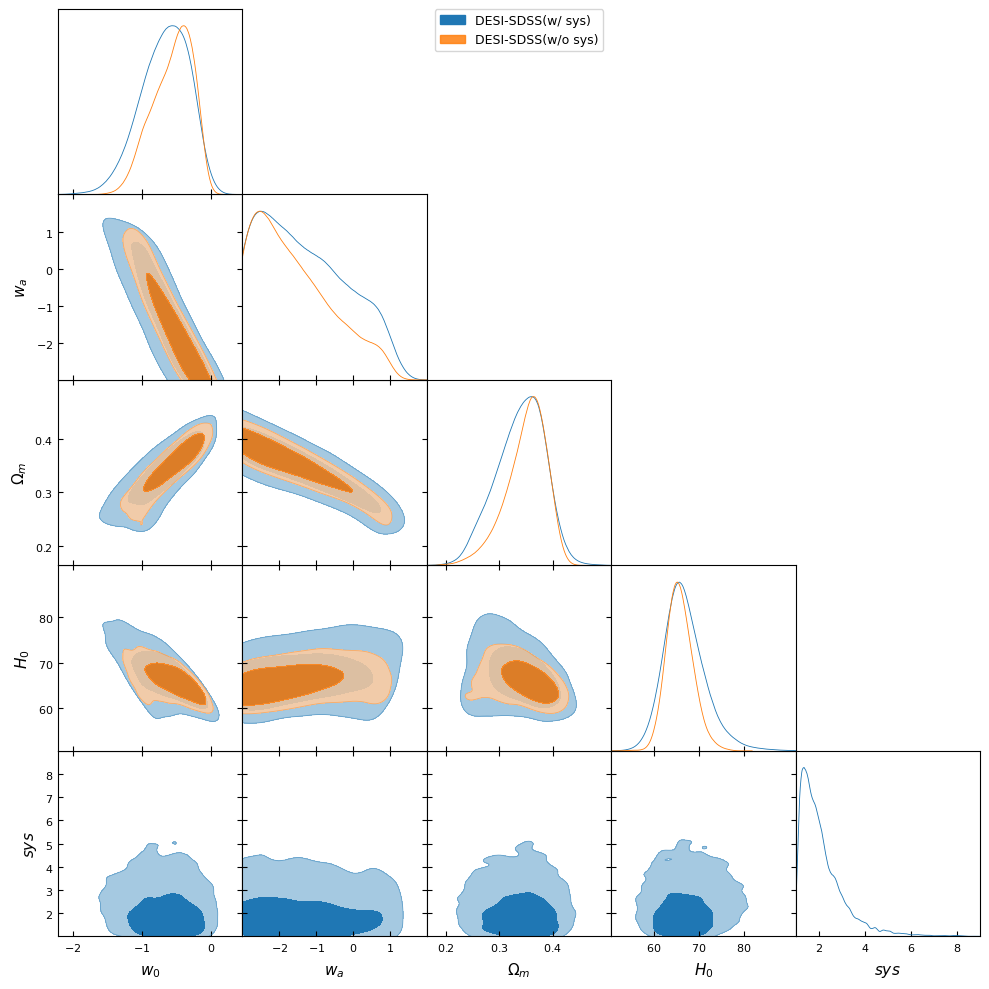

In [35]:
g = plots.get_subplot_plotter()
g.triangle_plot([base_w_wa_baosys['desi-sdss'],base_w_wa['desi-sdss']], 
                ['w','wa','OmegaM','H0','sys'],
                filled=True, 
                colors=['C0','C1'],
                line_args=[{'color':'C0'},
               {'color':'C1'}],
               )

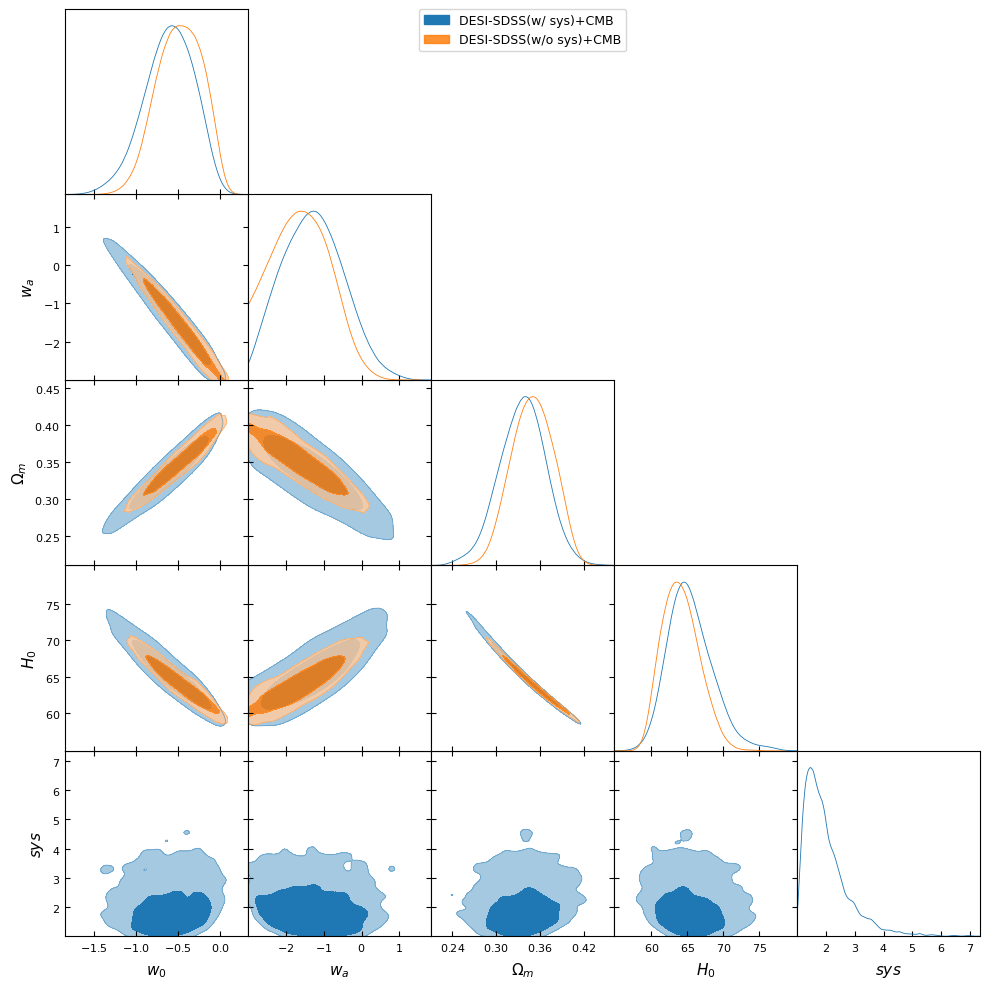

In [36]:
g = plots.get_subplot_plotter()
g.triangle_plot([base_w_wa_baosys['desi-sdss_cmb'],base_w_wa['desi-sdss_cmb']], 
                ['w','wa','OmegaM','H0','sys'],
                filled=True, 
                colors=['C0','C1'],
                line_args=[{'color':'C0'},
               {'color':'C1'}],
               )

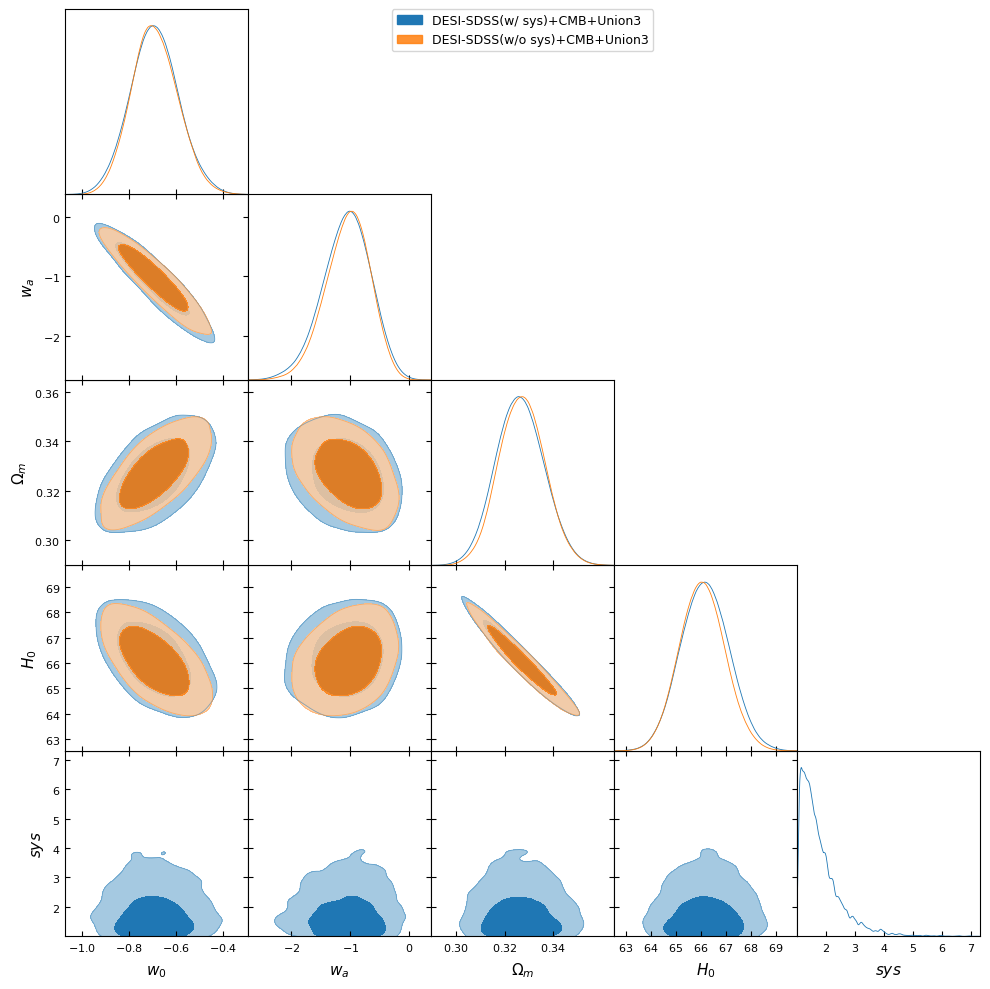

In [37]:
g = plots.get_subplot_plotter()
g.triangle_plot([base_w_wa_baosys['desi-sdss_cmb_union3'],base_w_wa['desi-sdss_cmb_union3']], 
                ['w','wa','OmegaM','H0','sys'],
                filled=True, 
                colors=['C0','C1'],
                line_args=[{'color':'C0'},
               {'color':'C1'}],
               )

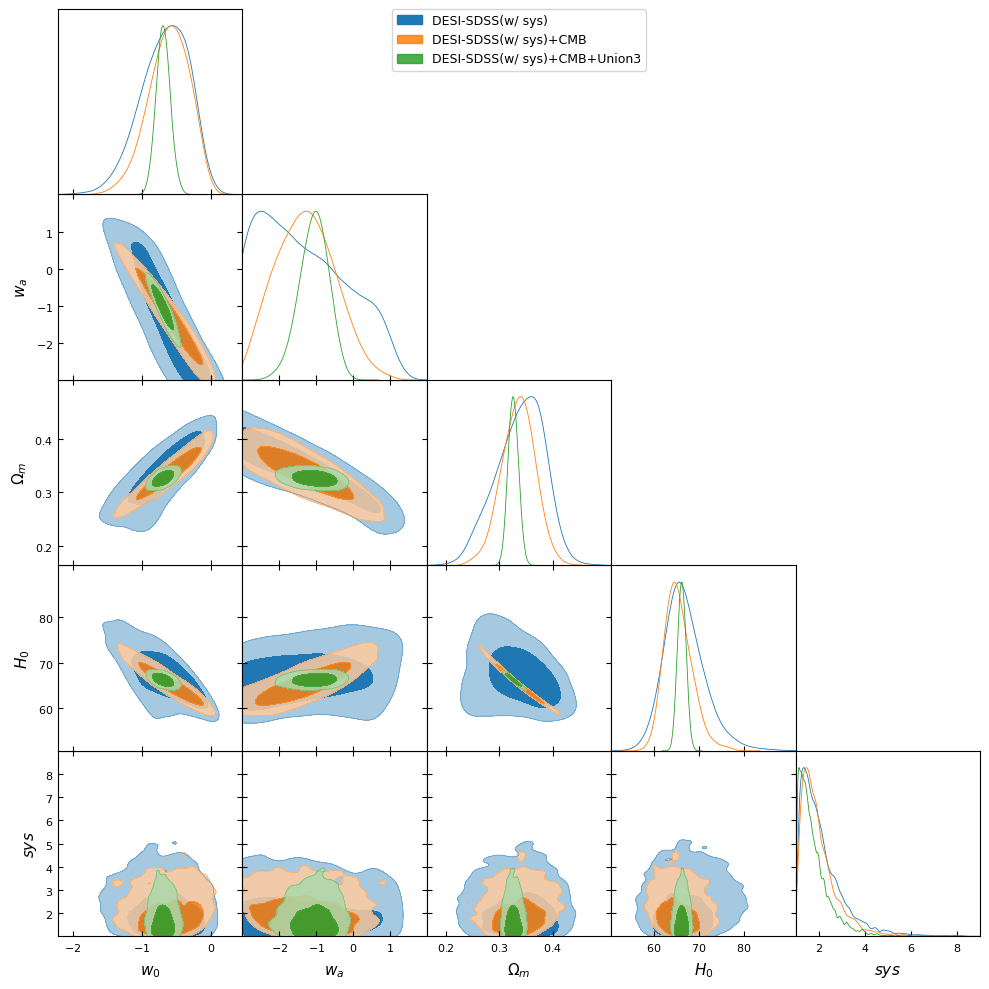

In [56]:
g = plots.get_subplot_plotter()
g.triangle_plot([base_w_wa_baosys['desi-sdss'],base_w_wa_baosys['desi-sdss_cmb'],base_w_wa_baosys['desi-sdss_cmb_union3'],], 
                ['w','wa','OmegaM','H0','sys'],
                filled=[True,True,True], 
                colors=['C0','C1','C2'],
                line_args=[{'color':'C0'},
                           {'color':'C1'},
                           {'color':'C2'},
                          ],
                #contour_ls= ['-', '-','-', '--','--', '--'],
               )

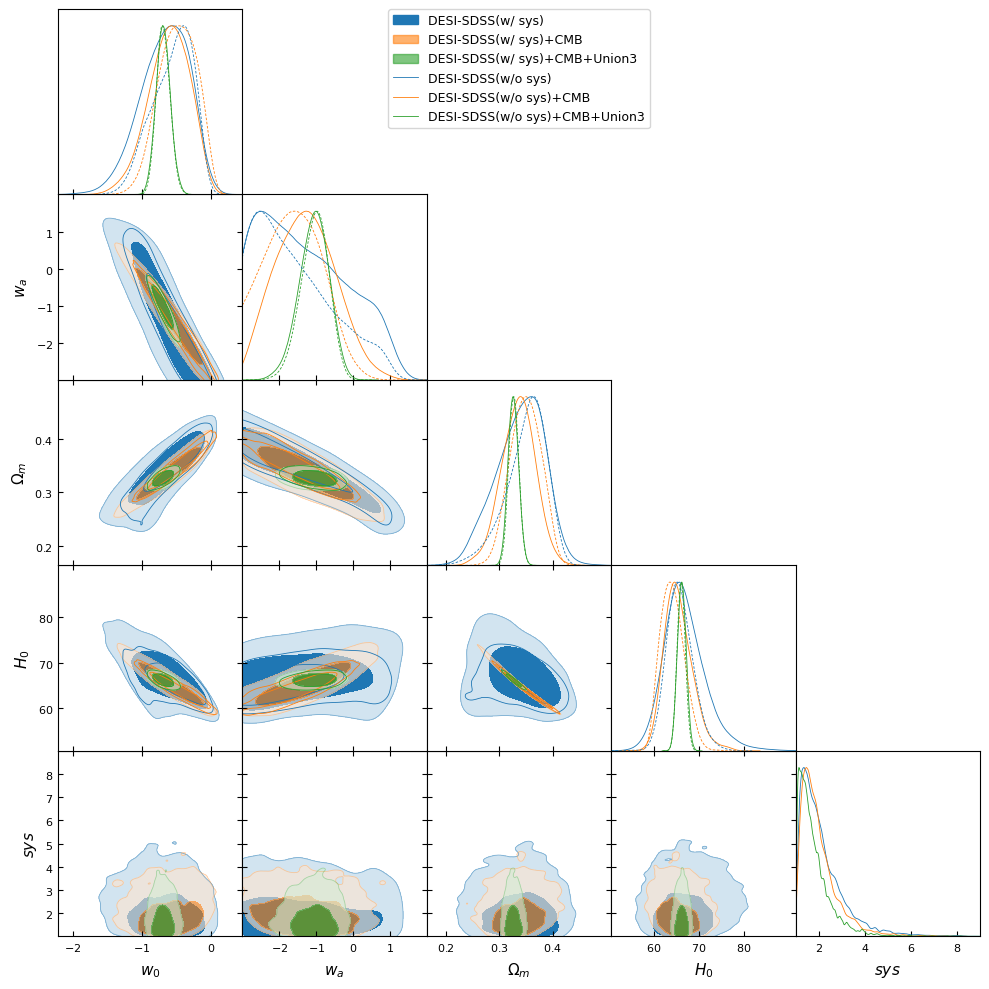

In [55]:
g = plots.get_subplot_plotter()
g.settings.solid_contour_palefactor = 0.8
g.settings.alpha_filled_add = 0.6
g.triangle_plot([base_w_wa_baosys['desi-sdss'],base_w_wa_baosys['desi-sdss_cmb'],base_w_wa_baosys['desi-sdss_cmb_union3'],
                 base_w_wa['desi-sdss'],base_w_wa['desi-sdss_cmb'],base_w_wa['desi-sdss_cmb_union3']
                ], 
                ['w','wa','OmegaM','H0','sys'],
                filled=[True,True,True,False,False,False], 
                colors=['C0','C1','C2','C0','C1','C2'],
                line_args=[{'color':'C0'},
                           {'color':'C1'},
                           {'color':'C2'},
                           {'color':'C0','ls':'--'},
                           {'color':'C1','ls':'--'},
                           {'color':'C2','ls':'--'}
                          ],
                #contour_ls= ['-', '-','-', '--','--', '--'],
               )

In [ ]:
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
corr_mock=cov2corr(mc115_3d125_jk[-1],60)
corr_jk=mc115_mock[-1]
tick=[0,20,40,60]
loc=[10,30,50]
label=[r'$\delta_{\xi_0}$',r'$\delta_{\xi_2}$',r'$\delta_{\xi_4}$']

masku = np.triu(np.ones_like(corr, dtype=bool))
maskl = np.tril(np.ones_like(corr, dtype=bool))

ax=sns.heatmap(corr_mock,mask=masku, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": 1})
ax=sns.heatmap(corr_jk,mask=maskl, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar=False)
ax.set_xlabel('Jackknife Correlation Matrix',fontsize=25)
ax.set_ylabel('Reference Correlation Matrix',fontsize=25)

ax.invert_yaxis()
ax.set_xticks(tick)
ax.set_xticks(loc,minor=True)
ax.set_xticklabels(label,minor=True,fontsize=20)

ax.set_yticks(tick)
ax.set_yticks(loc,minor=True)
ax.set_yticklabels(label,minor=True,fontsize=20)